In [1]:
# imports
import numpy as np
import random
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from IPython.display import Markdown as md

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

sns.set_style('darkgrid')
sns.set_context({'font.size': 12})
plt.rcParams["figure.figsize"] = (6,4)


# reusable functions
def get_degrees(G):
    return np.array([val for (_, val) in G.degree()])


def plot_distribution(x, y, title, xlabel='values', ylabel='count', plot_type=None):
    if plot_type == 'scatter':
        plt.scatter(x, y)
    elif plot_type == 'bar':
        plt.bar(x, y)
    else:
        plt.plot(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Part 1: Binning degree distributions

**Task**

* Binning real numbers
  * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
  * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
  * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.


**Solution**

In [2]:
random.seed(1)
gauss = [random.gauss(mu=2, sigma=0.125) for i in range(5000)]
hist, bin_edges = np.histogram(a=gauss, bins=10)

print('Length of histogram values array: ', len(hist))
print('Length of bin edges array: ', len(bin_edges))

Length of histogram values array:  10
Length of bin edges array:  11


The function returns an array containing the values of the histogram and the array containing bin edges. The arrays have different lengths - the bin edges array has one more element than the histogram values
(`length(hist)+1`).

For plotting, based on bin edges, we calculate the middle point of each bin and assign the corresponding histogram value to it. 

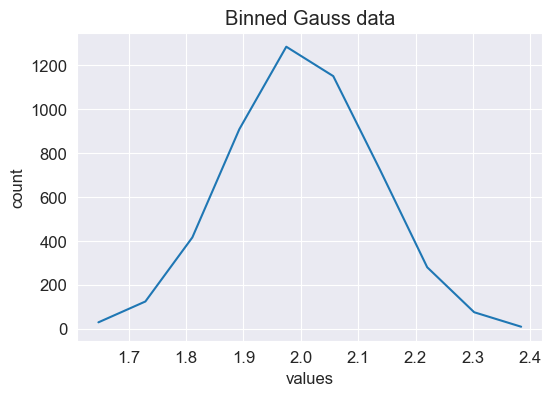

In [3]:
x = [np.mean([bin_edges[i], bin_edges[i+1]]) for i in range(len(bin_edges)-1)]

plot_distribution(x=x, y=hist, title='Binned Gauss data') # custom function

*Fig 1. A sample from a Gaussian distribution with $\mu=2$ and $\sigma=0.125$, binned into 10 intervals. The figure shows the count of observations corresponding to every bin.*

**Task**
* Binning integers
  * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
  * Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.
  * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 

**Solution**

In [4]:
np.random.seed(1)

poiss = np.random.poisson(lam=10, size=5000)
p_min, p_max = poiss.min(), poiss.max()
print('Min: ', p_min, ' Max: ', p_max)

v = np.arange(p_min, p_max+1, 1) # +1 in the stop parameter needed because of nature of the function
hist, bin_edges = np.histogram(a=poiss, bins=v)
print('Sum over bin counts: ', hist.sum())

Min:  0  Max:  24
Sum over bin counts:  5000


Setting the first and last entry of $v$ to the smallest and highest value observed, respectively, is correct because of how `numpy.histogram` deals with this extreme values. According to the documentation, all but the last (righthand-most) bin is half-open i.e. [1, 2), [2, 3) ... [n-1, n]. Therefore, all the observed values are included in the bins, which is confirmed by the sum over bin counts equal to the total number of observations.

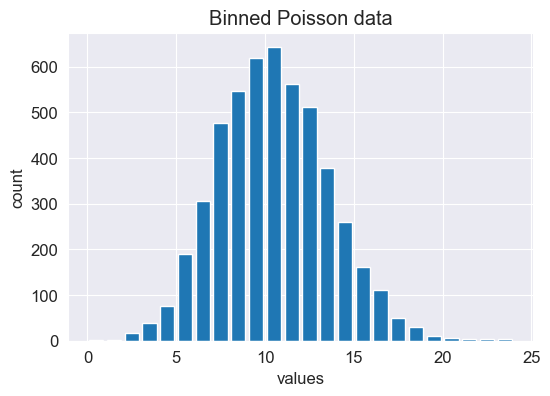

In [5]:
x = [np.mean([v[i], v[i+1]]) for i in range(len(v)-1)]

plot_distribution(x=x, y=hist, title='Binned Poisson data', plot_type='bar') # custom function

*Fig 2. A sample from a Poisson distribution with $\lambda=10$, binned into 25 intervals. The figure shows the count of observations corresponding to every bin.*

**Task**
* Binning and plotting degree distributions. 
  * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
**Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
  * Now, use `networkx` to create the graph and extract the degree distribution.
  * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

**Solution**

5000


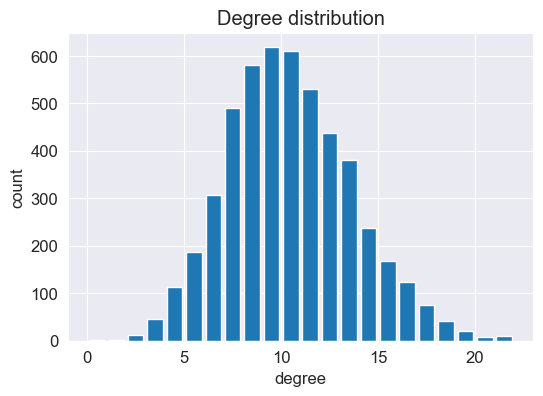

In [6]:
N = 5000
k = 10
p = k/(N-1) # k = p*(N-1)

ER = nx.erdos_renyi_graph(N, p)
degrees = get_degrees(ER) # custom function

v = np.arange(degrees.min(), degrees.max()+1, 1)
hist, bin_edges = np.histogram(a=degrees, bins=v)
print(hist.sum())

x = [np.mean([v[i], v[i+1]]) for i in range(len(v)-1)]

plot_distribution(x=x, y=hist, title='Degree distribution', xlabel='degree', plot_type='bar') # custom function

*Fig 3. Degree distribution of the Erdös-Renyi (ER) network with $N = 5000$ nodes and $p = \frac{10}{4999}$ probability of each link. The figure shows the count of nodes corresponding to every degree bin.*

# Part 2: Random networks and plotting in `networkx`

**Task**
* In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.

**Solution**

> Consider an Erdős-Rényi network with N = 3000 nodes, connected to each other with probability p = $10^{–3}$.
> * a) What is the expected number of links, $\langle L \rangle$? \
> \
>       $\langle L \rangle = \frac{pN(N-1)}{2} = \frac{3000*(3000-1)}{2}*10^{-3}=4498.5$ <br>
> 
> * b) In which regime is the network? \
> \
>       Supercritical Regime - because $\frac{lnN}{N} > p > \frac{1}{N}$ <br>
> 
> * c) Calculate the probability $p_c$ so that the network is at the critical point. \
> \
>       $p_c = \frac{1}{N} = \frac{1}{3000} = 0.0003$ <br>
>       
> * d) Given the linking probability p = $10^{–3}$, calculate the number of nodes $N^{cr}$ so that the network has only one component. \
> \
>       Graph needs to be in the connected regime, so $p > \frac{lnN}{N}$. <br>
>       Therefore N needs to be no smaller than $\log N^{cr} = \frac{N^{cr}-1}{1000} \implies N^{cr} = 9120$
> * e) For the network in (d), calculate the average degree $\langle k^{cr} \rangle$ and the average distance between two randomly chosen nodes $\langle d \rangle$. <br>
> <br>
>       $\langle k \rangle = p*(N-1) = 9.119$ <br> 
>       $\langle d \rangle = \frac{ln N}{ln \langle k \rangle} = 4.13$ <br>
> 
> * f) Calculate the degree distribution $p_k$ of this network (approximate with a Poisson degree distribution). \
> \
>       $p_k = e^{-\langle k \rangle} \frac{\langle k \rangle^k}{k!} = e^{9.119} \frac{9.119^k}{k!}$

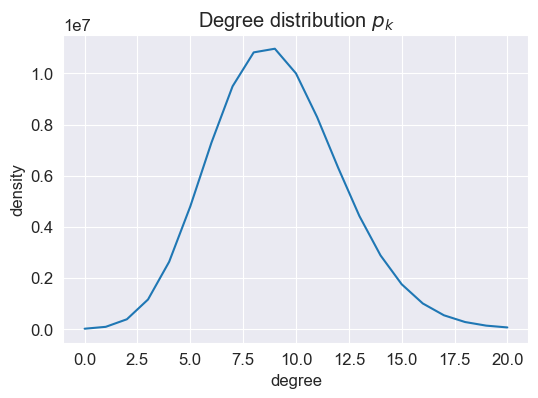

In [7]:
k = np.arange(0, 21, 1)
cum_prod = np.append(0, np.cumprod(k[1:]))
pk = np.e**9.119*9.119**k/scipy.special.factorial(k)

plot_distribution(x=k, y=pk, title=r'Degree distribution $p_k$', xlabel='degree', ylabel='density')

*Fig 4. Degree distribution of the Erdös-Renyi network with $N = 9120$ nodes and $p = 10^{-3}$ probability of each link. The figure shows the degree distribution approximation with a Poisson distribution.*

**Task**
* Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)
  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

**Solution**

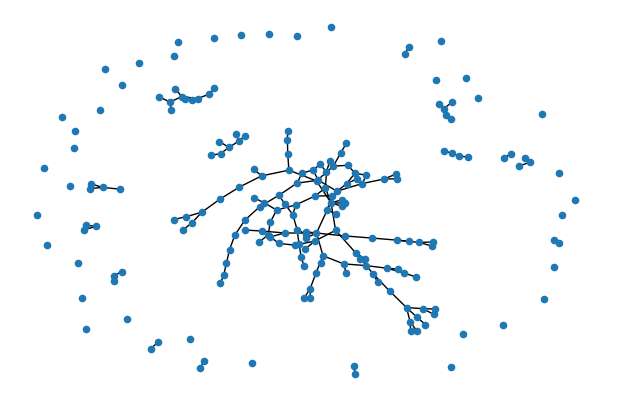

In [8]:
N = 200
p = 1.5/200
ER = nx.erdos_renyi_graph(N, p)
nx.draw(ER, node_size=20)

*Fig 5. A realization of a random network of size N=200 and average degree of 1.5 .*

GCC:  112


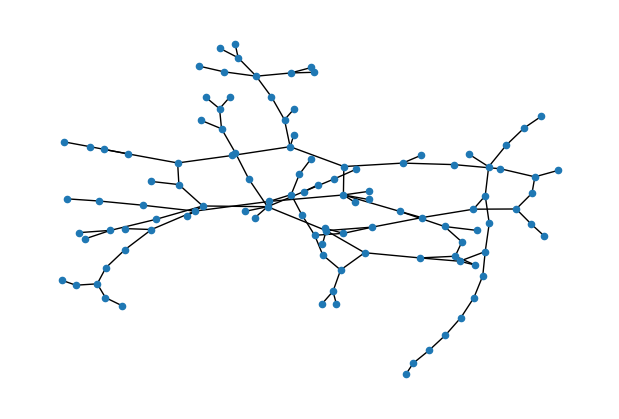

In [9]:
Gcc = sorted(nx.connected_components(ER), key=len, reverse=True)
Gcc = ER.subgraph(Gcc[0]) # giant connected component
print('GCC: ', len(Gcc))
nx.draw(Gcc, node_size=20)

*Fig 6. A Giant Connected Component extracted from a realization of a random network of size N=200 and average degree of 1.5 .*

In [10]:
node = random.choice(list(Gcc.nodes))
print('Node: ', node)

nodes2 = [n for n, v in nx.single_source_shortest_path_length(Gcc, node, 2).items() if v == 2]
print('Nodes 2 steps away from it: ', nodes2)

Node:  90
Nodes 2 steps away from it:  [94, 137, 146, 194]


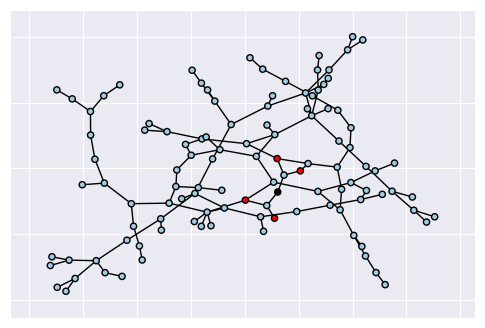

In [11]:
# plotting
color_map = ['#000000' if n == node else '#ff0000' if n in nodes2 else '#A0CBE2' for n in Gcc]

pos = nx.spring_layout(Gcc)
nodes = nx.draw_networkx_nodes(Gcc, node_color=color_map, node_size=20, pos=pos)
nodes.set_edgecolor('black')
nx.draw_networkx_edges(Gcc, pos)

*Fig 7. A Giant Connected Component extracted from a realization of a random network of size N=200 and average degree of 1.5 . A random node is marked in black, and the nodes that are two steps from it are marked in red.*

# Part 3: Watts-Strogatz Networks

**Task**
* Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.
* Let's understand the behavior of the WS model as we increase _p_ in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).

**Solution**

In [12]:
p_values = [0.0, 0.1, 1] # p values to calculate shortest path length <d> for each watts strogatz graph

for i in p_values: # loop through p values and calculate <d> with built in networkx function: average_shortest_path_length
    WS = nx.watts_strogatz_graph(n=500, k=4, p=i)
    path = nx.average_shortest_path_length(WS)
    print(f"<d> for Watts-Strogatz graph with p = {i}:", round(path, 3))

<d> for Watts-Strogatz graph with p = 0.0: 62.876
<d> for Watts-Strogatz graph with p = 0.1: 7.789
<d> for Watts-Strogatz graph with p = 1: 4.8


When p = 1 the probability of rewiring each path becomes 100%. This means that the average shortest path length falls very rapidly when approaching 1.

In [13]:
p_values = [0.0, 0.01, 0.03, 0.05, 0.1, 0.2] # p values to be used for watts strogath graphs

networks = {} # initialize dictionairy to store networks generated for each of the p values

for i in p_values: 
    networks[i] = [nx.watts_strogatz_graph(500, 4, p=i) for _ in range(50)]
    # store the list of networks in the dictionary with the current p value as the key

In [14]:
mean_values = [] # store mean values for the 50 graphs for each p value
std_values = [] # store standard deviation values for the 50 graphs for each p value

for p in p_values:
    avg_path = [nx.average_shortest_path_length(G) for G in networks[p]] # calculate the average shortest path for every of the 50 graphs
    
    mean_values.append(np.mean(avg_path)) # calculate the average for the 50 graphs
    std_values.append(np.std(avg_path)) # calculate the standard deviation for the 50 graphs

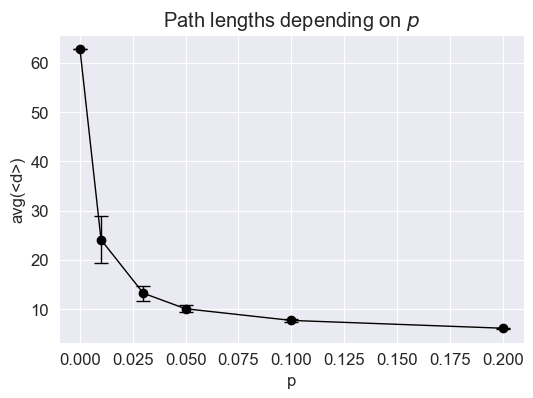

In [15]:
plt.errorbar(p_values, mean_values, yerr=std_values, fmt='-o', capsize=5, color='black', lw=1)
# plot p values by meanvalues with std as error, format is line and dot with capsize 5 on errors
plt.xlabel('p')
plt.ylabel('avg(<d>)')
plt.title(r'Path lengths depending on $p$')
plt.show()

*Fig 8. Average length of the shortest path in the Watts-Strogatz graph. Figure presents results for parameter p between 0 and 0.2.*

# Part 4. The Barabasi-Albert Model

**Task**
* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.
* Now create a 5000 node network.
  * What's the maximum and minimum degree?
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.

**Solution**

In [16]:
def create_BA(N, pref_attachment=True):
    G = nx.Graph()
    G.add_edge(1, 2)
    for i in range(3, N+1):
        nodes = list(G.nodes)
        if pref_attachment:
            degrees = get_degrees(G) # custom function
            prob = degrees/degrees.sum()
            next = np.random.choice(a=nodes, p=prob)
        else:
            next = np.random.choice(a=nodes)
        G.add_edge(i, next)
    return G

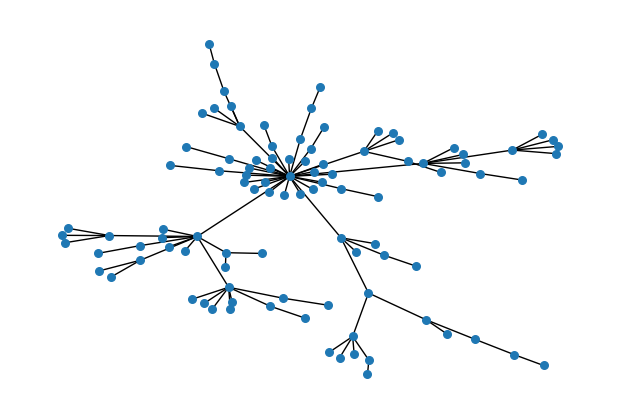

In [17]:
np.random.seed(1)
N = 100
BA_100 = create_BA(N) # custom function
nx.draw(BA_100, node_size=30)

*Fig 9. A network generated by the Barabási-Albert model, of size N=100.*

Min:  1  Max:  230


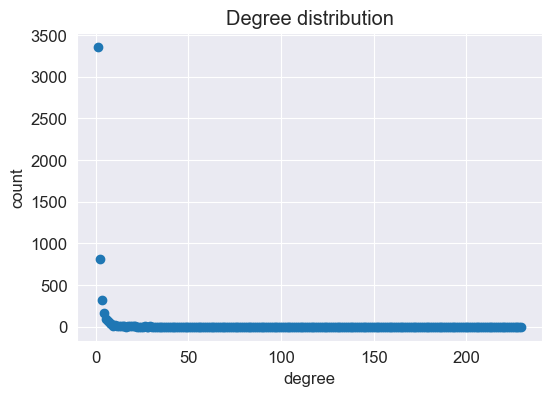

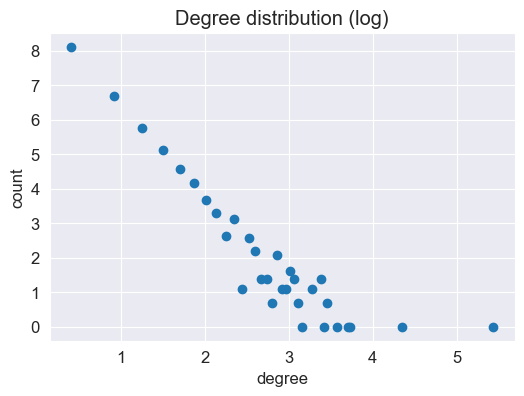

In [18]:
np.random.seed(1)
N = 5000
BA = create_BA(N) # custom function

d = get_degrees(BA) # custom function
print('Min: ', d.min(), ' Max: ', d.max())

v = np.arange(d.min(), d.max()+1, 1)
hist, bin_edges = np.histogram(a=d, bins=v)
x = [np.mean([v[i], v[i+1]]) for i in range(len(v)-1)]

plot_distribution(x, hist, title='Degree distribution', xlabel='degree', plot_type='scatter')
plot_distribution(np.log(x), np.log(hist), title='Degree distribution (log)', xlabel='degree', plot_type='scatter')

*Fig 10. & 11. The degree distribution of a network generated by the Barabási-Albert model. The figure shows $pk$ for a single network of size N=5000. It shows both the linearly-binned (top) and the log-binned version (botton) of $pk$.*

# Part 5 Power-laws and the friendship paradox

**Task**

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

* Pick a node _i_ at random (e.g. use `random.choice`). [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).
* Find _i_'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.
* Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.
* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

**Solution**

In [19]:
np.random.seed(1)
randomNode = np.random.choice(list(BA.nodes)) # picking a random node i using random.choice
degree = BA.degree(randomNode)
print(f"Degree of a random node number {randomNode}: ", degree)

Degree of a random node number 236:  5


In [20]:
neighbors = list(BA.neighbors(randomNode)) # neighbors of random node
print(f"Neighbors of {randomNode}: ", neighbors)

degreesOfNeighbors = list([BA.degree(i) for i in neighbors]) # degree of neighbors
print(f"Degrees of {randomNode}'s neighbors: ", degreesOfNeighbors)

avgDegreesOfNeighbors= np.mean(degreesOfNeighbors) # calculate avg degree of neighbors
print(f"Average degree of {randomNode}'s neighbors: ", avgDegreesOfNeighbors)

Neighbors of 236:  [21, 941, 1978, 3117, 4276]
Degrees of 236's neighbors:  [22, 2, 1, 1, 1]
Average degree of 236's neighbors:  5.4


In the current example the friendship paradox is true as 5 is smaller than 5.4 .

In [21]:
counter = 0 # initialize counter
simulation = 1000

for i in range(simulation): # check friendship paradox 1000 times - follows same logic as above
    randomNode = np.random.choice(list(BA.nodes))
    randomNodeDegree = BA.degree(randomNode)
    
    neighbors = list(BA.neighbors(randomNode))
    if neighbors:  # check if neighbors actually exist
        avgNeighborDegree = np.mean([BA.degree(i) for i in neighbors])
        if avgNeighborDegree > randomNodeDegree:
            counter = counter + 1

print(f"Friendship paradox is true {counter} out of {simulation} times")

Friendship paradox is true 871 out of 1000 times


**Task**

Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. 

* Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.

**Solution**

In [22]:
N = 5000
BA_nonpref = create_BA(N, pref_attachment=False) # custom function

np.random.seed(1)
random.seed(1)
ER = nx.erdos_renyi_graph(n=N, p=1/2500)

The preferential & non-preferential graphs have an average amount of 2500 edges (1 edge between every 2 nodes). We want to build an ER graph of the same $p$ - this means that each node needs to have a probability of $1/2500$ of generating an edge.

So at this point we actually have 3 networks:
* preferential attachment: BA
* no preferential attachment: BA_nonpref
* Erdos Renyi network: ER

In [23]:
degrees_pref = [deg for node, deg in BA.degree()] # list of degrees for preferential
degrees_nonpref = [deg for node, deg in BA_nonpref.degree()] # list of degrees for no preferential
degrees_ER = [deg for node, deg in ER.degree()] # list of degrees for ER 

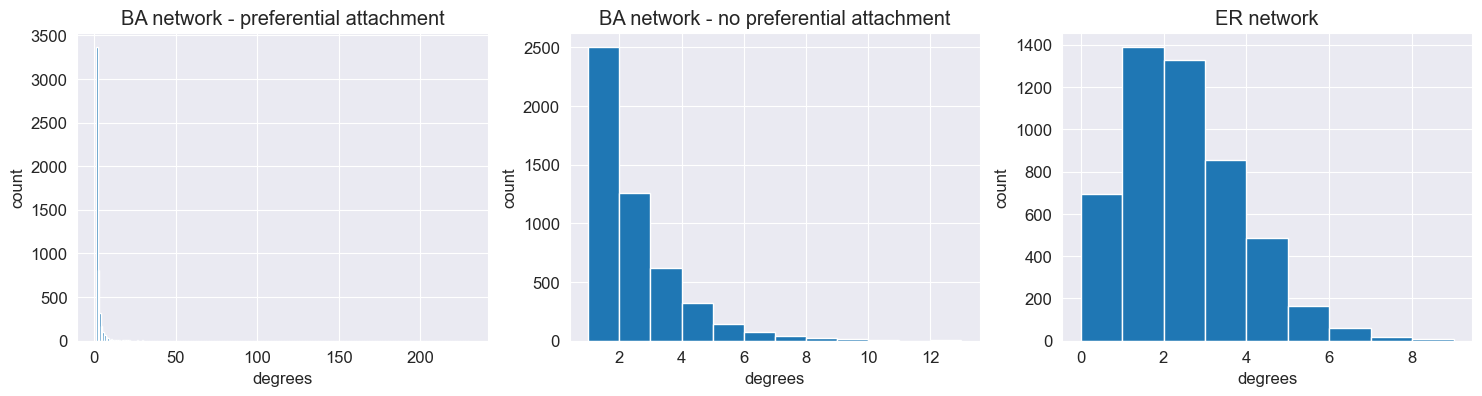

In [24]:
fig, ax = plt.subplots(1,3,figsize=(18,4))
degrees = [degrees_pref, degrees_nonpref, degrees_ER]
titles = ["BA network - preferential attachment", "BA network - no preferential attachment", "ER network"]
for i, d in enumerate(degrees):
    ax[i].hist(d, bins=range(min(d), max(d) + 1)) # limit x-axis to actual degrees
    ax[i].set_xlabel('degrees') 
    ax[i].set_ylabel('count') 
    ax[i].set_title(titles[i])
plt.show()

*Fig 12. Degree distribution for three different networks of the same size. First network was created according to Barabasi-Albert model. Second was created with Barabasi-Albert model but links were created without bias towards the hubs. Third network is an Erdos-Renyi model realisation.*

In [25]:
networks = [BA, BA_nonpref, ER]

print("Number of connected components:")
for i, n in enumerate(networks):
    no_cc = len(list(nx.connected_components(n)))
    print(f"{titles[i]}: {no_cc}")

Number of connected components:
BA network - preferential attachment: 1
BA network - no preferential attachment: 1
ER network: 844


Network with referential attachment has a few nodes with high degree. This can be seen from the x-axis as it goes up to 200. The x-axis is set from the min to max values of the degrees, meaning there is a node present which has that many degrees. There is also a lot of low-degree nodes, because they have a small chance of getting attached.

Network without preferential attachment has a similar degree distribution, except that it is not so heavy-tailed i.e. there are not so many extreme values. There are no nodes with insanely high degrees and the amount of nodes with degree $1$ is lower.

Erdos Renyi graph is quite different. It follows a Poisson distribution, where there are not really any extreme outliers. Most of the nodes have around the median amount of degrees or lower. Additionally, the network has more than 800 components, while the BA networks has only one.

# Part 6 Configuration-model networks

**Task**

Next, we will create configuration-model networks with degree distributions of our own choice. Follow the recipe below for success
* Extract the degree sequence for the 100-node Barabasi-Albert network you created in Part 4 above. Create the configuration-model network with an algorithm you have coded on your own and include this algorithm as part of your answer to this exercise (so don't use the built-in NetworkX function, but the one you created during week 3). 
* Plot the network using NetworkX. When you compare this network to your Barabasi-Albert network visually, what differences do you notice?

**Solution**

In [26]:
def configuration_model (degrees: list) :
    assert np.sum(degrees) % 2 == 0
    
    halfedges = []
    for i in range(len(degrees)):
        halfedges += [i for _ in range(degrees[i])]
    np.random.shuffle(halfedges)

    edgelist = []
    for i in range(0, len(halfedges), 2):
        edgelist.append((halfedges[i], halfedges[i+1]))

    return edgelist

In [27]:
np.random.seed(1)
edges = configuration_model(get_degrees(BA_100)) # custom function
G_conf = nx.Graph()
G_conf.add_nodes_from(np.arange(0, 100, 1))
G_conf.add_edges_from(edges)

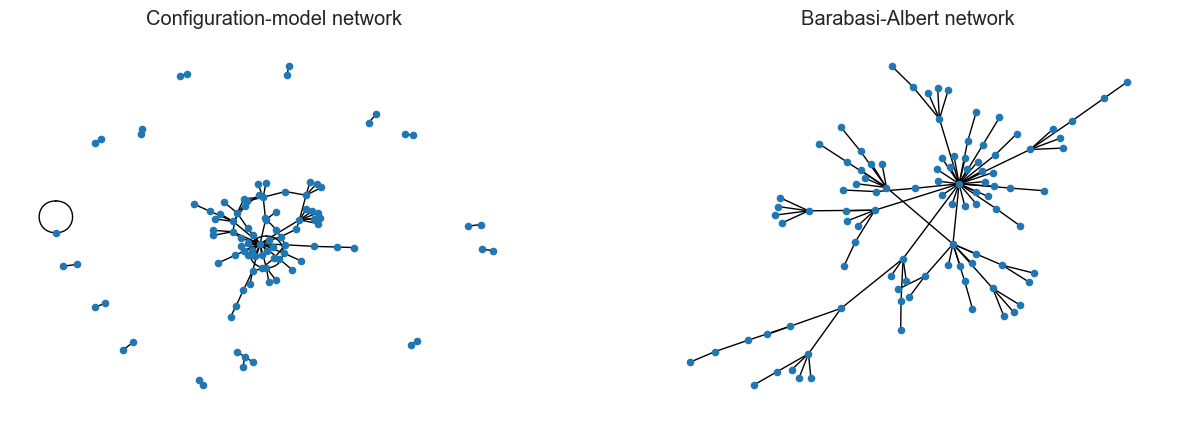

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Configuration-model network')
ax[1].set_title('Barabasi-Albert network')
nx.draw(G_conf, ax=ax[0], node_size=20)
nx.draw(BA_100, ax=ax[1], node_size=20)

*Fig 13. Comparison between configuration-model network (left) and Barabasi-Albert network (right).*

The networks are different, even though they have the same degree distribution. Barabasi-Albert network is fully connected, while configuration-model network has unconnected clusters. Furthermore, configuration-model network has cycles which do not appear in the Barabasi-Albert net.

**Task**
* Create a 5000-node configuration-model network, where half of the nodes have degree 3 and the other half have degree 5. Again, create the network using the function you coded in Week 3, and not using the NetworkX function.
* What should the sum of node degrees be if all nodes had degrees as described in the exercise?
* Calculate and print the sum of node degrees and plot the binned degree distribution nicely. If the node degrees are not exactly as described in the exercise (half having degree 3, the other half degree 5), explain what might have caused this difference in node degrees.

**Solution**

In [29]:
np.random.seed(1)
edges_5000 = configuration_model([*[3]*2500, *[5]*2500]) # custom function
G_conf_5000 = nx.Graph()
G_conf_5000.add_nodes_from(np.arange(0, 5000, 1))
G_conf_5000.add_edges_from(edges_5000)

In [30]:
print('Expected sum of degrees: ', 2500 * 3 + 2500 * 5)
print('Actual sum of degrees: ', np.sum([d for _, d in G_conf_5000.degree]))

Expected sum of degrees:  20000
Actual sum of degrees:  19992


Number of nodes with degree 3:  2500
Number of nodes with degree 4:  8
Number of nodes with degree 5:  2492


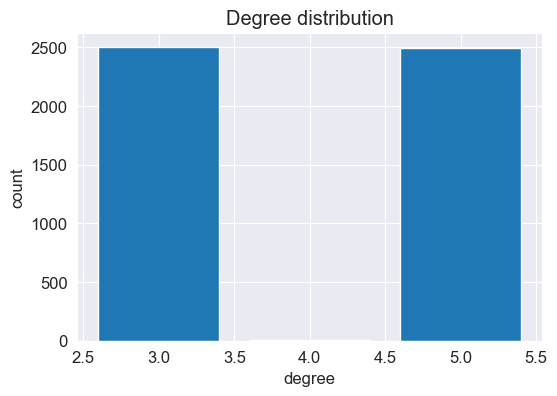

In [31]:
p = get_degrees(G_conf_5000)
v = np.arange(p.min() - 0.5, p.max() + 1.5, 1)
h = np.histogram(p, v)[0]
x = np.unique(p)

for i in x:
    print(f'Number of nodes with degree {i}: ', np.sum(p==i))

plt.bar(x, h)
plt.title('Degree distribution')
plt.xlabel('degree')
plt.ylabel('count')
plt.show()

*Fig 14. Degree distribution for the network generated with the configuration-model algorithm. Network was supposed to have 2500 nodes with degree of 3 and 2500 nodes with degree of 5.*

The degree distribution slightly differ from what we would expect - eight nodes has degree 4 instead of 5. It is caused by the self loops/repeted edges that are not blocked by the algorithm. 